In [3]:
import pandas as pd
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

## Convert Wave File to Time Series

In [70]:
waveform = []
genre = []
sr = []
for g in ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']:
    for i in range(100):
        if g == 'jazz' and i == 54:
            continue
            ## TODO: why does this file not work?
        fn = f'{i:05}'
        sample_rate, data = wavfile.read(f'data/genres_original/{g}/{g}.{fn}.wav')
        waveform.append(data)
        genre.append(g)
        sr.append(sample_rate)

In [49]:
df_ts = pd.DataFrame({'waveform': waveform, 'genre': genre, 'sample_rate': sr})
df_ts.head()


,waveform,genre,sample_rate
0,"[240, 544, 250, -115, -74, -307, -743, -733, -...",blues,22050.0
1,"[112, 141, 45, 42, 58, 83, 127, 139, 191, 237,...",blues,22050.0
2,"[623, 1563, 964, -590, -1144, -2045, -2826, -2...",blues,22050.0
3,"[-426, -1003, -1182, -1346, -1521, -1497, -138...",blues,22050.0
4,"[-207, -304, -273, -276, -274, -243, -124, 51,...",blues,22050.0


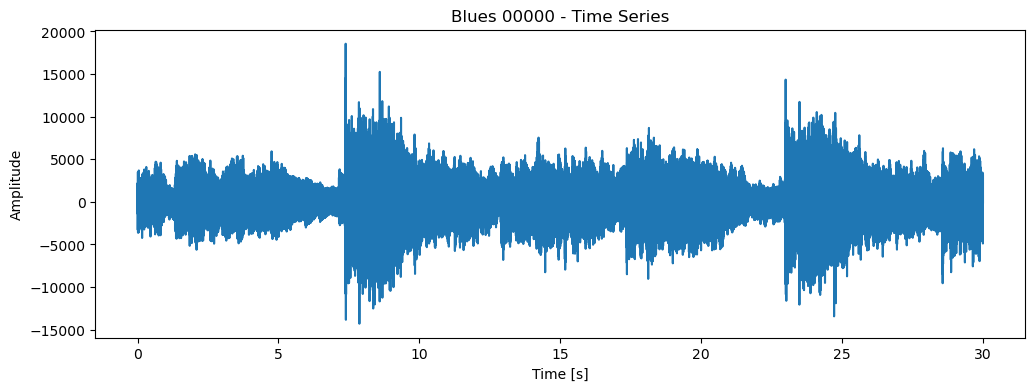

In [52]:
# To visualize a waveform:
waveform, genre, sample_rate = df_ts.loc[0]['waveform'], df_ts.loc[0]['genre' ], df_ts.loc[0]['sample_rate']

duration = waveform.shape[0] / sample_rate
time = np.linspace(0., duration, data.shape[0])

# Plot the time series
plt.figure(figsize=(12, 4))
plt.plot(time, data)
plt.title('Blues 00000 - Time Series')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

## Convert Spectogram Image to RGB Pixels

In [63]:
from PIL import Image
import numpy as np
import os


In [69]:
x_img = []
genre = []

for g in ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']:
    for i in range(100):
        if g == 'jazz' and i == 54:
            continue
        fn = f'{i:05}'
        path = f'data/images_original/{g}/{g}{fn}.png'
        target_size=(128, 128) # can change this in the future
        img = Image.open(path).convert('RGB')
        img = img.resize(target_size)
        x = np.array(img) / 255.0 
        x_img.append(x)
        genre.append(g)


In [73]:
# Currently pandas df, but convert to tensor if desired!
img_data = pd.DataFrame({'image': x_img, 'genre': genre})
img_data.head()

,image,genre
0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",blues
1,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",blues
2,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",blues
3,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",blues
4,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...",blues
